<a href="https://colab.research.google.com/github/carla-biermann/uniform-solution-sampling/blob/main/experiment/notebooks/runtime_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Analysing the runtimes of the XORSample' and LinMod algorithms

## Set up

In [2]:
# @title Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import json

In [3]:
# @title Load XOR data
df_xor = pd.read_csv('https://raw.githubusercontent.com/carla-biermann/uniform-solution-sampling/main/experiment/results/big_runtimes_xor.csv')
df_xor.drop('Unnamed: 0', axis=1, inplace=True)
df_xor.head()

,s,iteration,num sols,SolverMemOut,SolverTotalTime,SATClauses,SavileRowClauseOut,SavileRowTotalTime,SolverSatisfiable,SavileRowTimeOut,SolverNodes,SATVars
0,0,2,384,0.0,33308.77,1764179.0,0.0,159.341,1.0,0.0,12723110.0,589826.0
1,0,6,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0,9,384,0.0,33305.10,1764179.0,0.0,161.444,1.0,0.0,12723110.0,589826.0
3,0,10,384,0.0,33310.22,1764179.0,0.0,162.496,1.0,0.0,12723110.0,589826.0
4,0,14,384,0.0,33339.42,1764179.0,0.0,159.258,1.0,0.0,12723110.0,589826.0


In [4]:
# @title Load Linmod data
df_linmod = pd.read_csv('https://raw.githubusercontent.com/carla-biermann/uniform-solution-sampling/main/experiment/results/big_runtimes_linmod.csv')
df_linmod.drop('Unnamed: 0', axis=1, inplace=True)
df_linmod.head()

,lambda,iteration,num sols,SolverMemOut,SolverTotalTime,SATClauses,SavileRowClauseOut,SavileRowTotalTime,SolverSatisfiable,SavileRowTimeOut,SolverNodes,SATVars
0,0.02,10,10,NaN,240.193,NaN,0,96.737,1,0,605960,NaN
1,0.02,14,8,NaN,234.828,NaN,0,90.797,1,0,605001,NaN
2,0.02,15,9,NaN,243.271,NaN,0,98.005,1,0,596463,NaN
3,0.02,16,6,NaN,240.641,NaN,0,92.495,1,0,607051,NaN
4,0.02,17,7,NaN,243.555,NaN,0,96.388,1,0,599576,NaN


In [5]:
# @title Load large LinMod data
df_linmod_ext = pd.read_csv('https://raw.githubusercontent.com/carla-biermann/uniform-solution-sampling/main/experiment/results/runtimes_linmod_extensive.csv')
df_linmod_ext.drop('Unnamed: 0', axis=1, inplace=True)
df_linmod_ext.head()

,lambda,iteration,num sols,SolverMemOut,SolverTotalTime,SATClauses,SavileRowClauseOut,SavileRowTotalTime,SolverSatisfiable,SavileRowTimeOut,SolverNodes,SATVars
0,0.1,7,37,NaN,237.058,NaN,0,95.026,1,0,607178,NaN
1,0.1,17,39,NaN,228.789,NaN,0,91.556,1,0,606886,NaN
2,0.1,18,31,NaN,232.437,NaN,0,96.353,1,0,605669,NaN
3,0.1,19,46,NaN,230.248,NaN,0,92.267,1,0,606877,NaN
4,0.1,22,30,NaN,233.995,NaN,0,95.615,1,0,602342,NaN


In [6]:
# @title Load Kissat data (find 1 solution)
df_kissat = pd.read_csv('https://raw.githubusercontent.com/carla-biermann/uniform-solution-sampling/main/experiment/results/runtimes_kissat_none.csv')
df_kissat.drop('Unnamed: 0', axis=1, inplace=True)
df_kissat.head()

,base,iteration,num sols,SolverMemOut,SolverTotalTime,SATClauses,SavileRowClauseOut,SavileRowTotalTime,SolverSatisfiable,SavileRowTimeOut,SolverNodes,SATVars
0,pars,0,1,0.0,4.26,1898422.0,0.0,76.216,1.0,0.0,923.0,635287.0
1,pars,2,1,0.0,3.95,1898422.0,0.0,77.383,1.0,0.0,923.0,635287.0
2,pars,3,1,0.0,3.74,1898422.0,0.0,76.593,1.0,0.0,923.0,635287.0
3,pars,4,1,0.0,3.35,1898422.0,0.0,77.139,1.0,0.0,923.0,635287.0
4,pars,6,1,0.0,2.79,1898422.0,0.0,80.870,1.0,0.0,923.0,635287.0


In [7]:
# @title Load Minion data (find 1 solution)
df_minion = pd.read_csv('https://raw.githubusercontent.com/carla-biermann/uniform-solution-sampling/main/experiment/results/runtimes_none.csv')
df_minion.drop('Unnamed: 0', axis=1, inplace=True)
df_minion.head()

,base,iteration,num sols,SolverMemOut,SolverTotalTime,SATClauses,SavileRowClauseOut,SavileRowTotalTime,SolverSatisfiable,SavileRowTimeOut,SolverNodes,SATVars
0,pars,2,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,pars,3,1,NaN,18.8464,NaN,0.0,58.305,1.0,0.0,1224.0,NaN
2,pars,5,1,NaN,19.1248,NaN,0.0,61.455,1.0,0.0,1224.0,NaN
3,pars,7,1,NaN,17.5710,NaN,0.0,63.985,1.0,0.0,1224.0,NaN
4,pars,8,1,NaN,19.4155,NaN,0.0,57.297,1.0,0.0,1224.0,NaN


In [8]:
# @title Load Minion data (find all solutions)
df_minion_all = pd.read_csv('https://raw.githubusercontent.com/carla-biermann/uniform-solution-sampling/main/experiment/results/runtime_none_minion_all.csv')
df_minion_all.drop('Unnamed: 0', axis=1, inplace=True)
df_minion_all.head()

,base,iteration,num sols,SolverMemOut,SolverTotalTime,SATClauses,SavileRowClauseOut,SavileRowTotalTime,SolverSatisfiable,SavileRowTimeOut,SolverNodes,SATVars
0,pars,0,384,NaN,225.252,NaN,0,84.774,1,0,607621,NaN
1,pars,1,384,NaN,213.879,NaN,0,82.188,1,0,607621,NaN
2,pars,2,384,NaN,222.068,NaN,0,80.465,1,0,607621,NaN
3,pars,3,384,NaN,225.906,NaN,0,84.435,1,0,607621,NaN
4,pars,4,384,NaN,219.116,NaN,0,83.518,1,0,607621,NaN


In [9]:
# @title Add 'Sol Category' column

def add_sol_category(df):
  # Define conditions and values for the new 'Sol Category' column
  conditions = [
      (df['num sols'] > 1),
      (df['num sols'] == 1),
      (df['num sols'] == 0)
  ]

  values = ['Multiple sol', 'One sol', 'No sol']

  # Apply conditions and values to create the new 'Sol Category' column
  df['Sol Category'] = np.select(conditions, values, default='Unknown')

  return(df)

df_xor = add_sol_category(df_xor)
df_linmod = add_sol_category(df_linmod)
df_kissat = add_sol_category(df_kissat)
df_minion = add_sol_category(df_minion)
df_linmod_ext = add_sol_category(df_linmod_ext)
df_minion_all = add_sol_category(df_minion_all)

df_xor.head()

,s,iteration,num sols,SolverMemOut,SolverTotalTime,SATClauses,SavileRowClauseOut,SavileRowTotalTime,SolverSatisfiable,SavileRowTimeOut,SolverNodes,SATVars,Sol Category
0,0,2,384,0.0,33308.77,1764179.0,0.0,159.341,1.0,0.0,12723110.0,589826.0,Multiple sol
1,0,6,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No sol
2,0,9,384,0.0,33305.10,1764179.0,0.0,161.444,1.0,0.0,12723110.0,589826.0,Multiple sol
3,0,10,384,0.0,33310.22,1764179.0,0.0,162.496,1.0,0.0,12723110.0,589826.0,Multiple sol
4,0,14,384,0.0,33339.42,1764179.0,0.0,159.258,1.0,0.0,12723110.0,589826.0,Multiple sol


In [10]:
# @title Add total time column

def add_total_time(df):

  df['TotalTime'] = df['SolverTotalTime'] + df['SavileRowTotalTime']

  return(df)

df_xor = add_total_time(df_xor)
df_linmod = add_total_time(df_linmod)
df_kissat = add_total_time(df_kissat)
df_minion = add_total_time(df_minion)
df_linmod_ext = add_total_time(df_linmod_ext)
df_minion_all = add_total_time(df_minion_all)

In [11]:
# @title Function to group samples by solution category and s

def group_data(df, var):

  # Store number of samples per solution category and s
  count_df = df.groupby(var)['SolverTotalTime'].count().to_frame()

  # Get averages per solution category and var for each column
  avg_df = df.groupby(var).mean().round(decimals=2)

  # Add number of samples to avg_df dataframe
  return(pd.concat([avg_df, count_df['SolverTotalTime'].rename("sample size")], axis=1))

## XOR Sampling

In [12]:
avg_df_xor = group_data(df_xor, 's')
avg_df_xor[['num sols', 'SolverTotalTime', 'SavileRowTotalTime', 'TotalTime', 'SATClauses', 'SATVars']]

<ipython-input-11-c68686616637>:9: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  avg_df = df.groupby(var).mean().round(decimals=2)


,num sols,SolverTotalTime,SavileRowTotalTime,TotalTime,SATClauses,SATVars
s,,,,,,
0,349.09,33333.06,159.85,33492.91,1764179.00,589826.00
1,193.20,21864.43,142.94,22007.37,1769670.73,590501.83
2,95.20,12819.82,111.01,12930.82,1771004.70,590744.27
3,49.60,7654.31,108.95,7763.27,1772063.50,590885.30
4,25.03,4549.94,109.90,4659.84,1773117.90,591019.97
5,11.47,1978.64,114.73,2093.37,1774361.67,591159.43


## Kissat find 1 solution

In [13]:
df_kissat.dropna(axis=0, inplace=True)
df_kissat.describe()[['num sols', 'SolverTotalTime', 'SavileRowTotalTime', 'TotalTime', 'SATClauses', 'SATVars']]

,num sols,SolverTotalTime,SavileRowTotalTime,TotalTime,SATClauses,SATVars
count,19.0,19.000000,19.000000,19.000000,19.0,19.0
mean,1.0,3.485263,78.117789,81.603053,1898422.0,635287.0
std,0.0,0.518774,2.590289,2.280870,0.0,0.0
min,1.0,2.790000,75.783000,79.260000,1898422.0,635287.0
25%,1.0,3.125000,76.391000,80.025000,1898422.0,635287.0
50%,1.0,3.350000,76.673000,80.489000,1898422.0,635287.0
75%,1.0,3.825000,80.543500,83.533500,1898422.0,635287.0
max,1.0,4.620000,83.595000,86.575000,1898422.0,635287.0


## LinMod Sampling

In [14]:
avg_df_linmod = group_data(df_linmod, 'lambda')
avg_df_linmod_ext = group_data(df_linmod_ext, 'lambda')

<ipython-input-11-c68686616637>:9: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  avg_df = df.groupby(var).mean().round(decimals=2)
<ipython-input-11-c68686616637>:9: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  avg_df = df.groupby(var).mean().round(decimals=2)


In [15]:
avg_df_linmod_full = avg_df_linmod.append(avg_df_linmod_ext)

# drop lambda = 1 row as something weird happened there
avg_df_linmod_full.drop(index=[1.0], inplace=True)

avg_df_linmod_full[['num sols', 'SolverTotalTime', 'SavileRowTotalTime', 'TotalTime']]

<ipython-input-15-f7de5fc172cd>:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  avg_df_linmod_full = avg_df_linmod.append(avg_df_linmod_ext)


,num sols,SolverTotalTime,SavileRowTotalTime,TotalTime
lambda,,,,
0.02,8.25,240.06,94.55,334.61
0.03,14.07,231.74,90.52,322.26
0.04,12.13,231.27,86.13,317.40
0.05,19.67,231.05,86.09,317.14
0.06,20.13,231.15,86.45,317.60
0.07,27.43,231.97,86.19,318.16
0.08,31.40,231.84,85.12,316.96
0.09,32.83,222.06,82.37,304.43
0.10,39.27,233.33,93.95,327.28


## Minion find 1 solution

In [16]:
df_minion.dropna(axis=0, inplace=True, subset=['SolverTotalTime'])
df_minion.describe()[['num sols', 'SolverTotalTime', 'SavileRowTotalTime', 'TotalTime']]

,num sols,SolverTotalTime,SavileRowTotalTime,TotalTime
count,19.0,19.000000,19.000000,19.000000
mean,1.0,17.836126,60.900105,78.736232
std,0.0,1.062827,3.191924,2.719439
min,1.0,15.529800,56.851000,74.424400
25%,1.0,17.474600,58.250000,76.476950
50%,1.0,17.770400,60.147000,78.726800
75%,1.0,18.488250,63.060500,80.990250
max,1.0,19.415500,67.075000,84.020700


## Minion find all solutions

In [17]:
df_minion_all.dropna(axis=0, inplace=True, subset=['SolverTotalTime'])
df_minion_all.describe()[['num sols', 'SolverTotalTime', 'SavileRowTotalTime', 'TotalTime']]

,num sols,SolverTotalTime,SavileRowTotalTime,TotalTime
count,30.0,30.000000,30.000000,30.00000
mean,384.0,218.702733,84.963667,303.66640
std,0.0,9.076612,2.471030,10.40171
min,384.0,186.796000,80.465000,268.67700
25%,384.0,217.730500,83.123500,300.89050
50%,384.0,221.423500,84.604500,304.66950
75%,384.0,224.068000,86.702750,310.16850
max,384.0,226.466000,89.435000,315.90100


## Plots

In [30]:
def plot_time_over_sol(time):

  plt.plot(avg_df_xor['num sols'], avg_df_xor[time], marker='o', linestyle='-', label='XORSample`')
  plt.plot(avg_df_linmod_full['num sols'], avg_df_linmod_full[time], marker='o', linestyle='--', label='LinMod')

  plt.title(time + ' over number of solutions')
  plt.xlabel('|Sols| in cell')
  plt.ylabel(time + ' in seconds')
  plt.legend()
  plt.show()

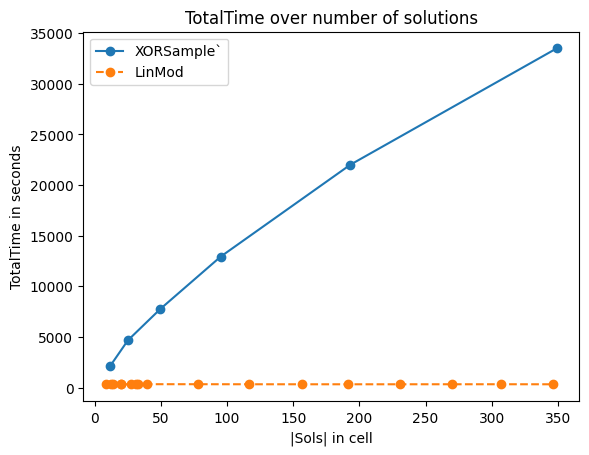

In [31]:
plot_time_over_sol('TotalTime')

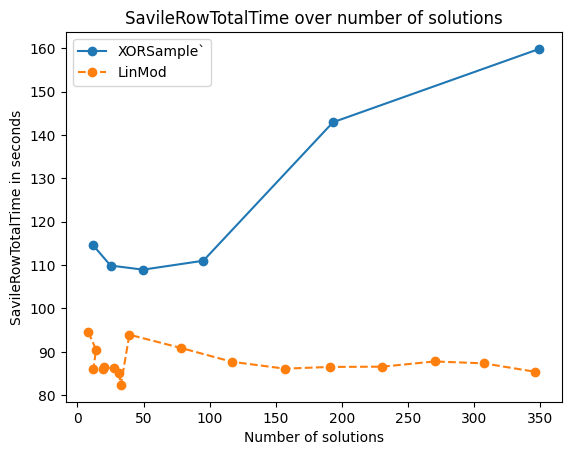

In [20]:
plot_time_over_sol('SavileRowTotalTime')

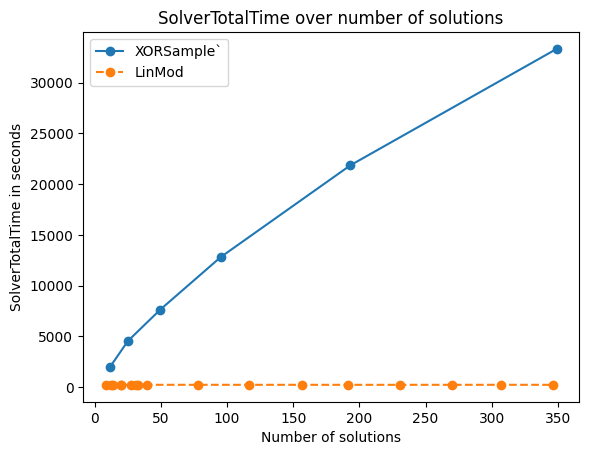

In [21]:
plot_time_over_sol('SolverTotalTime')

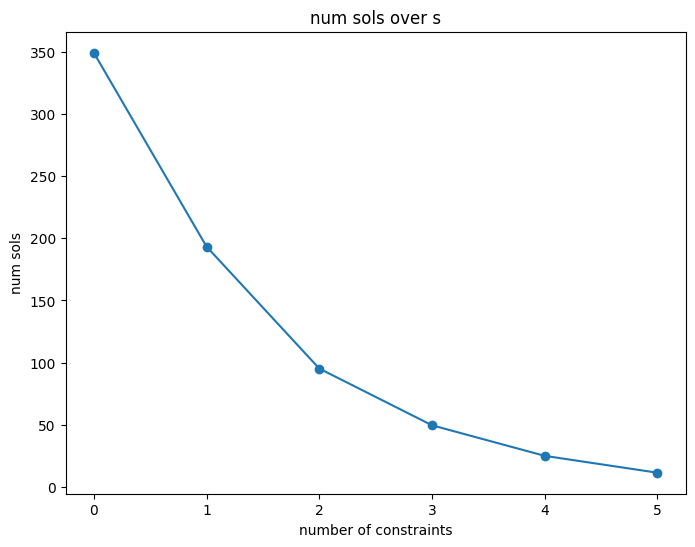

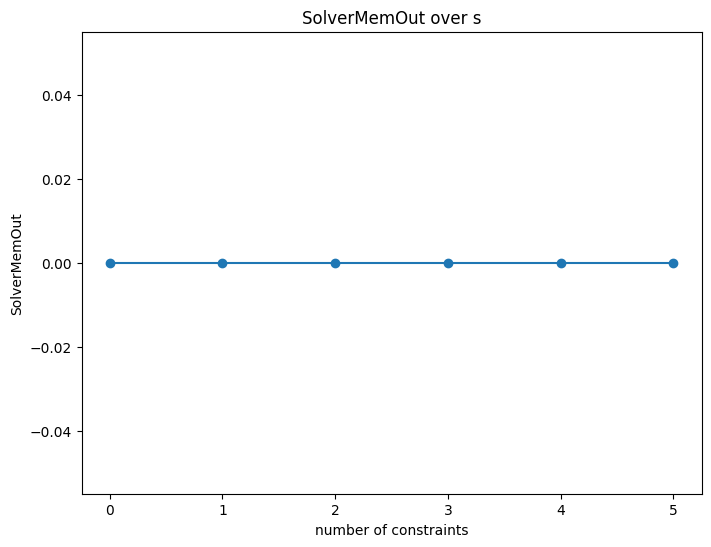

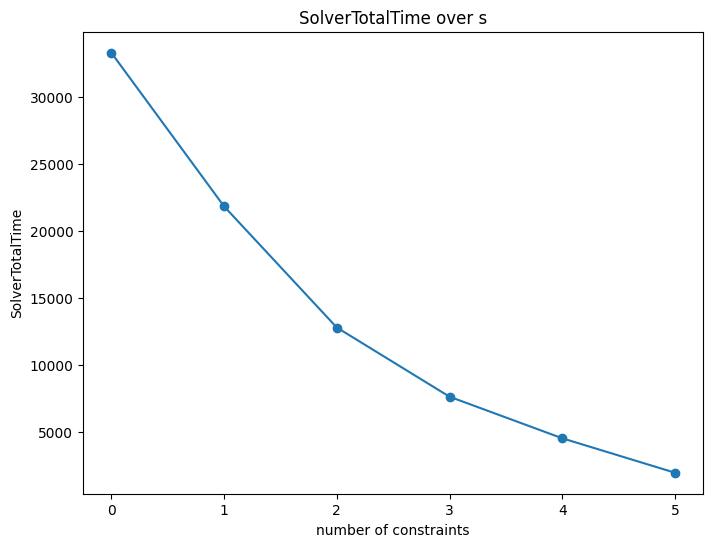

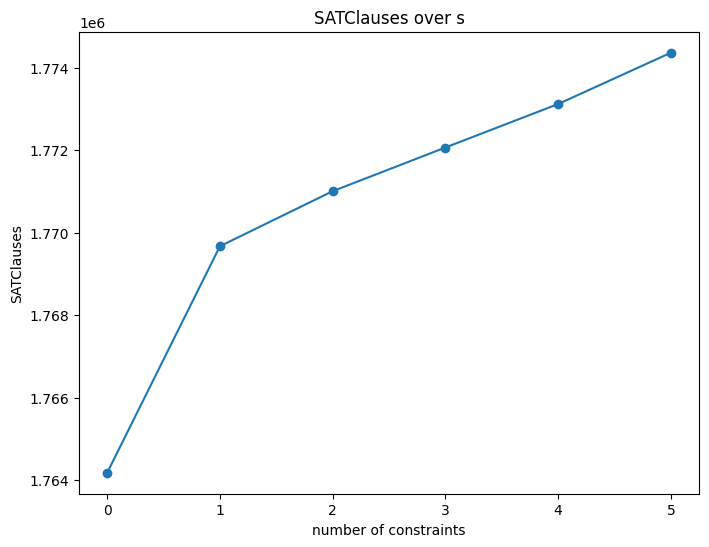

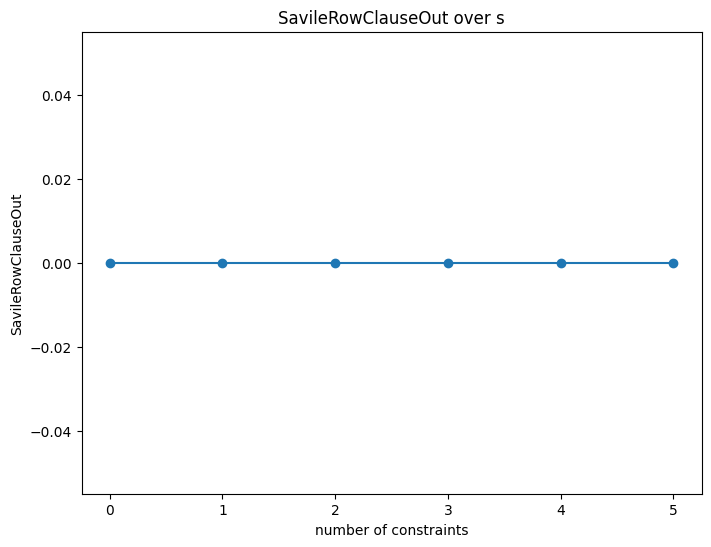

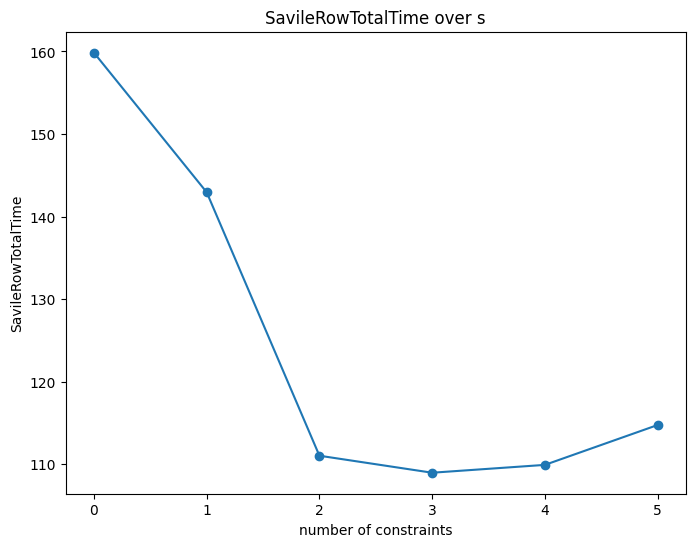

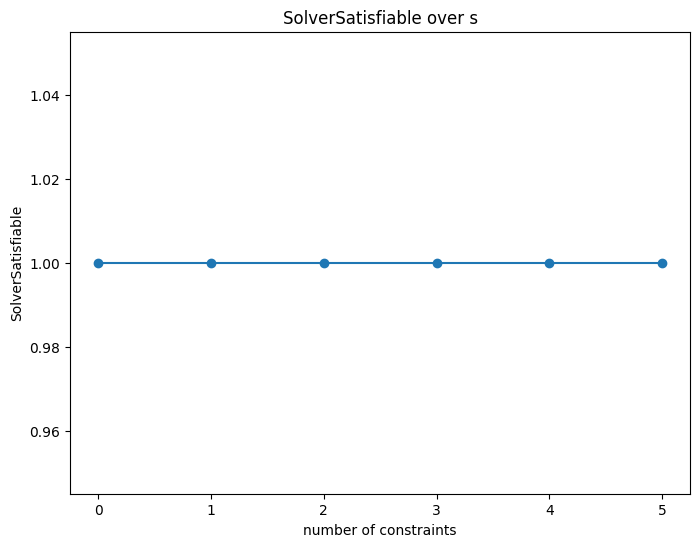

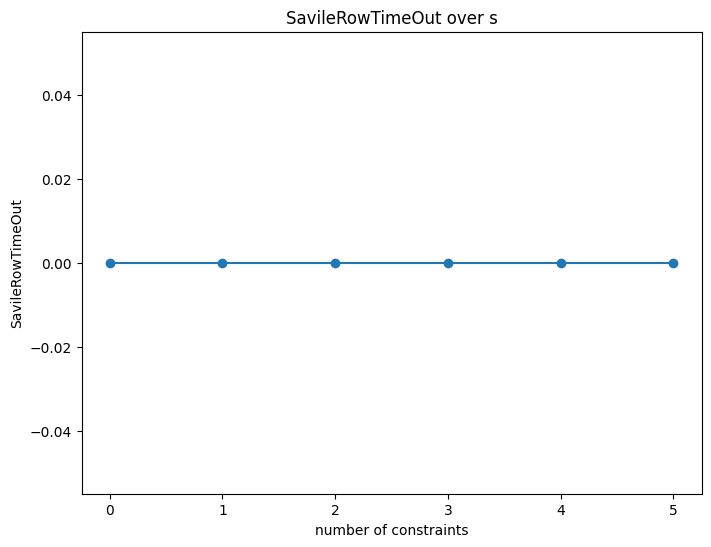

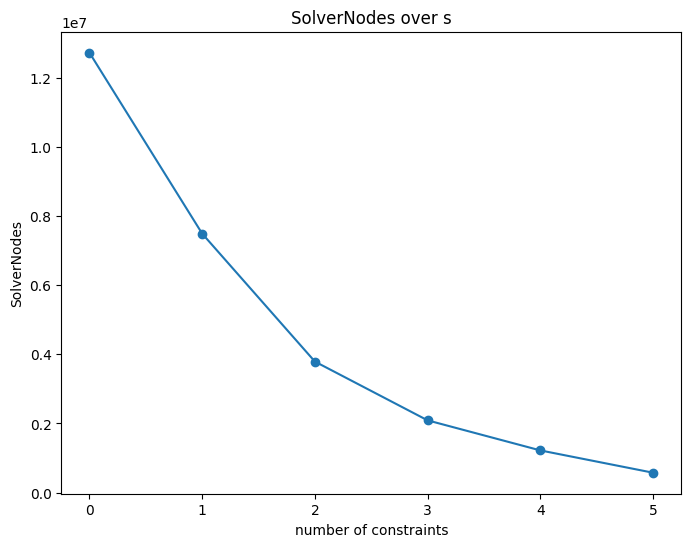

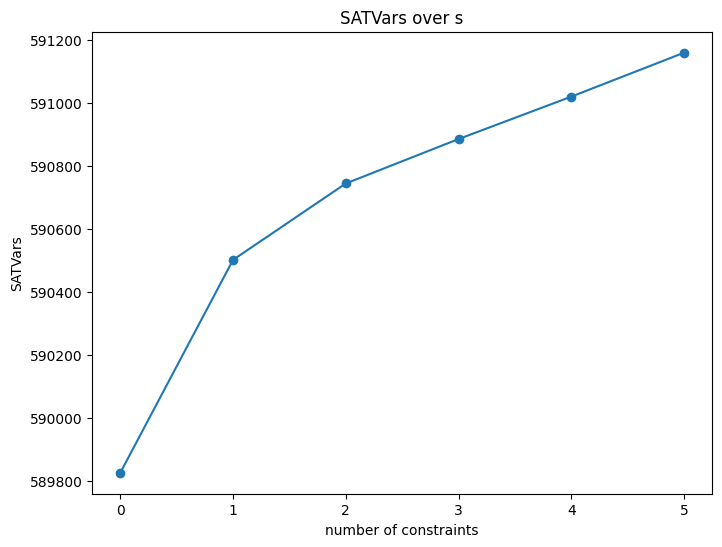

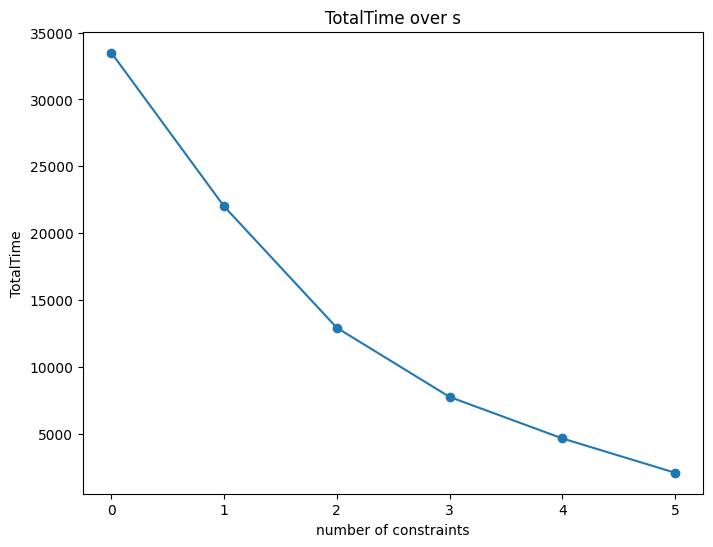

In [22]:
# Plot a line for each column

def plot_columns_over_var(avg_df, var):

  for column in avg_df.columns[1:-1]:

      fig, ax = plt.subplots(figsize=(8, 6))
      ax.plot(avg_df.index, avg_df[column], marker='o', linestyle='-')

      ax.set_title(column + ' over ' + var)
      ax.set_xlabel('number of constraints')
      ax.set_ylabel(column)
      plt.show()

plot_columns_over_var(avg_df_xor, 's')

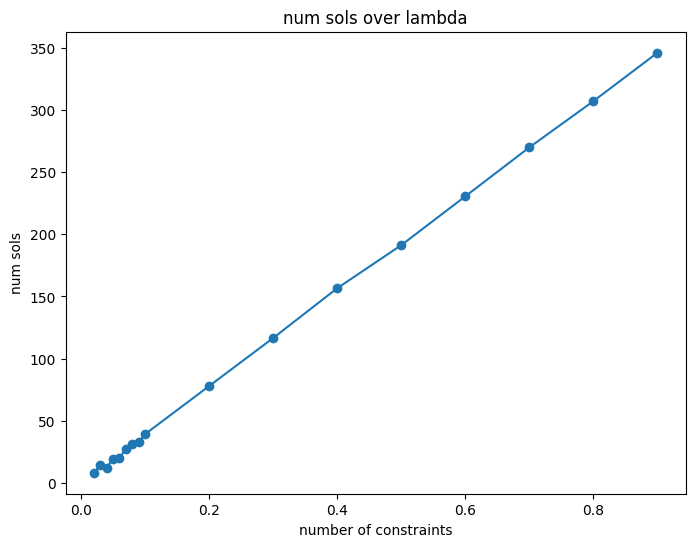

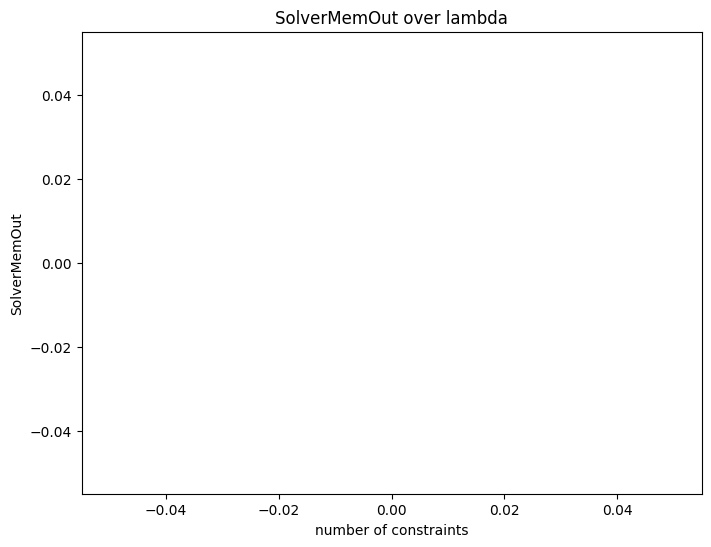

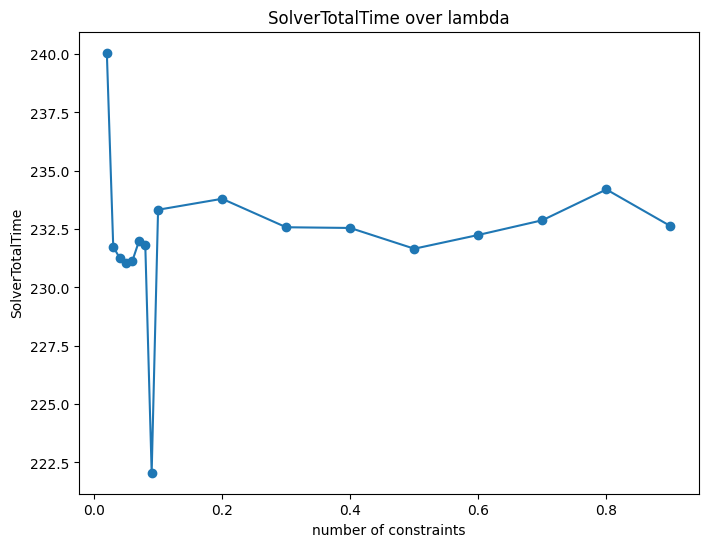

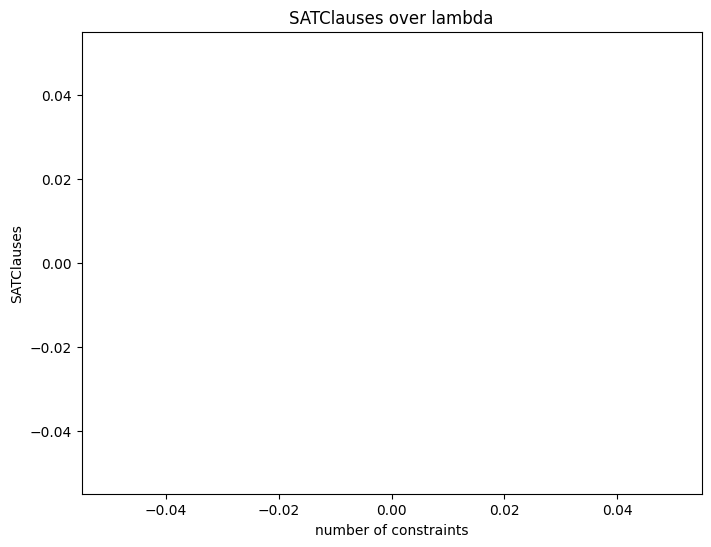

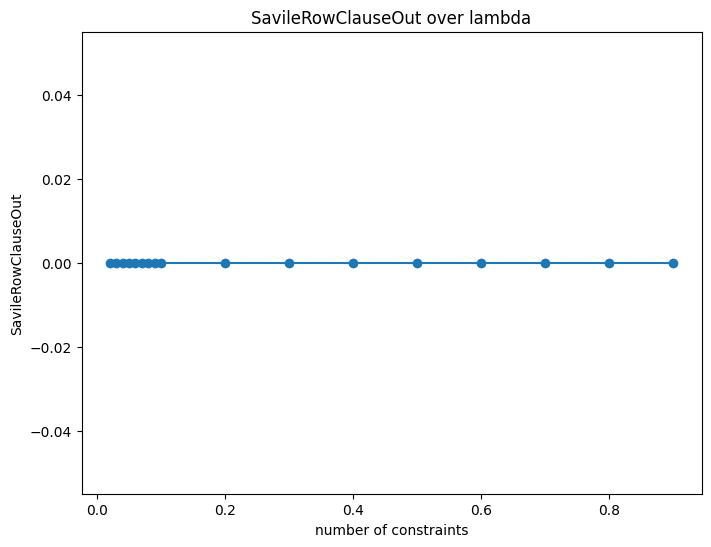

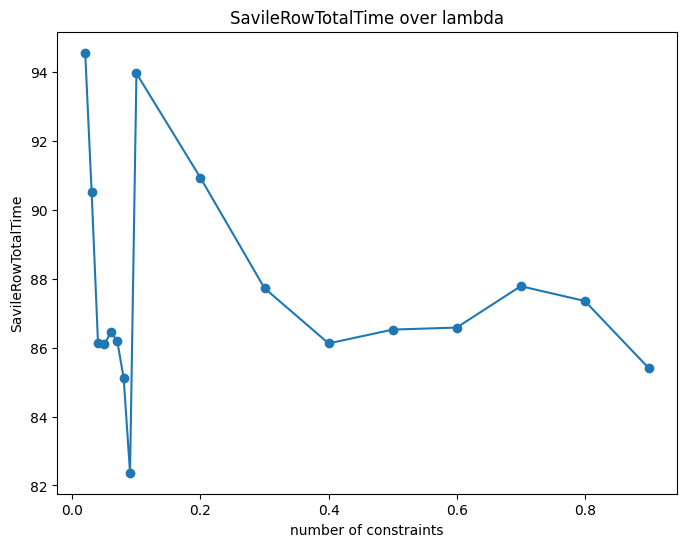

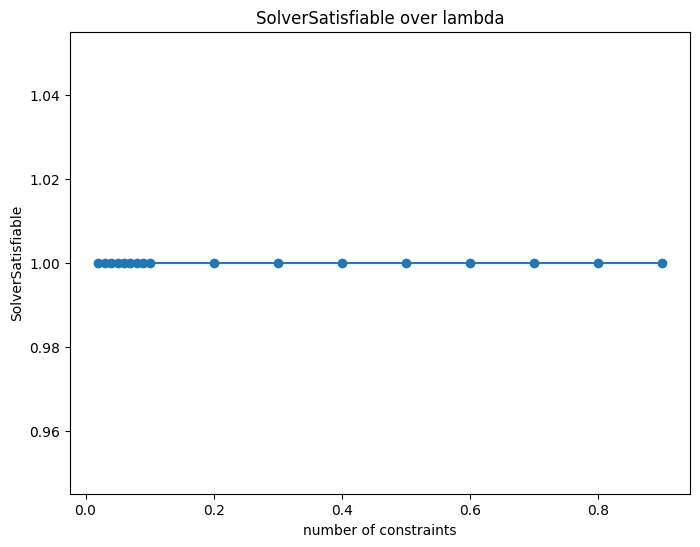

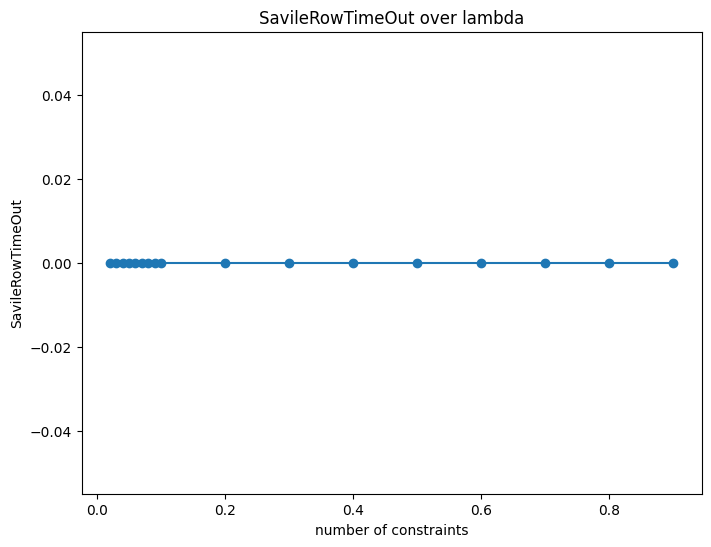

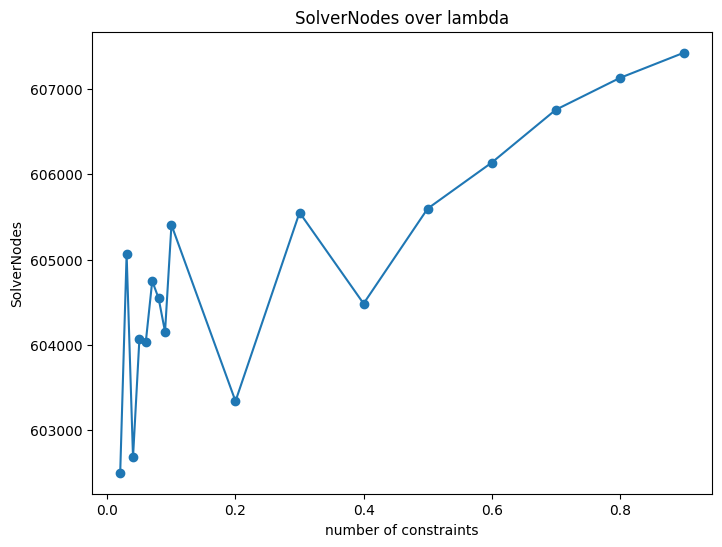

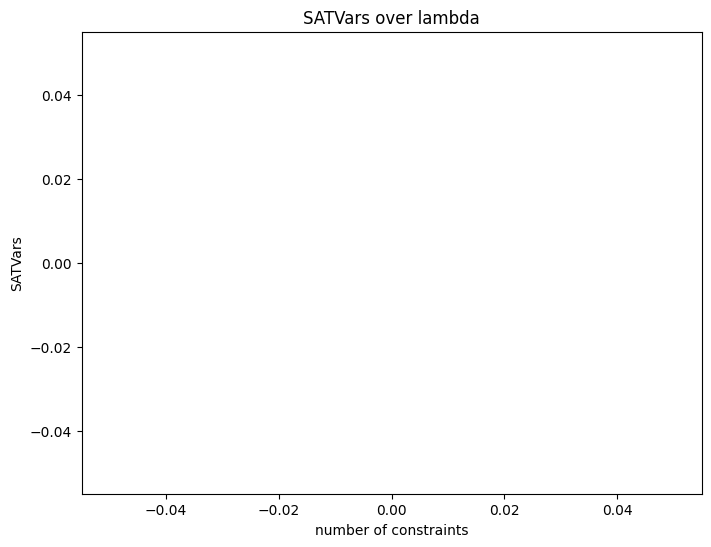

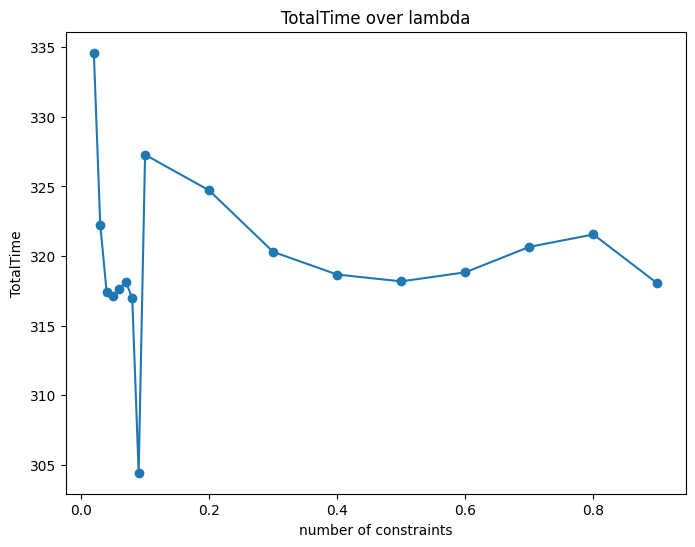

In [23]:
plot_columns_over_var(avg_df_linmod_full, 'lambda')

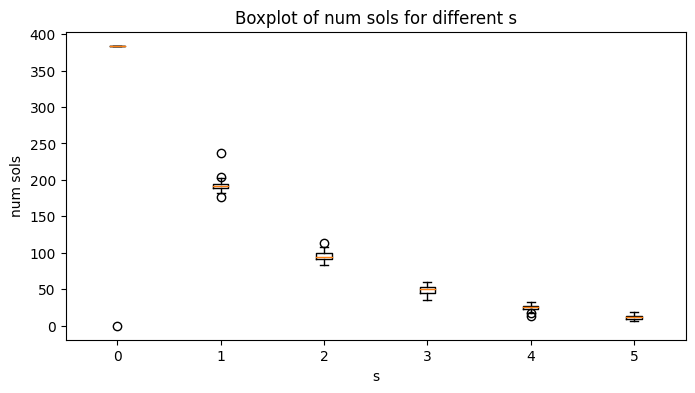

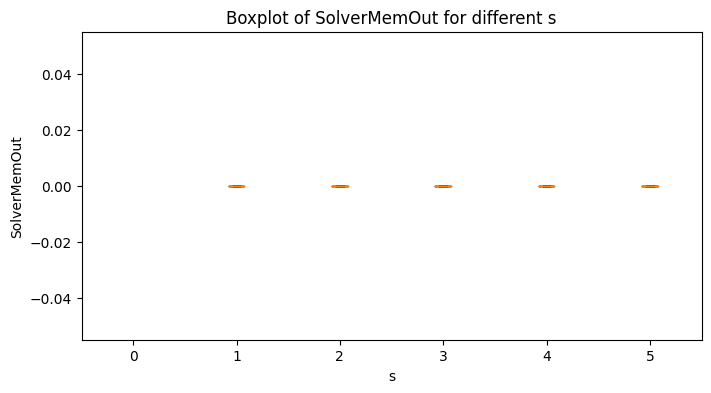

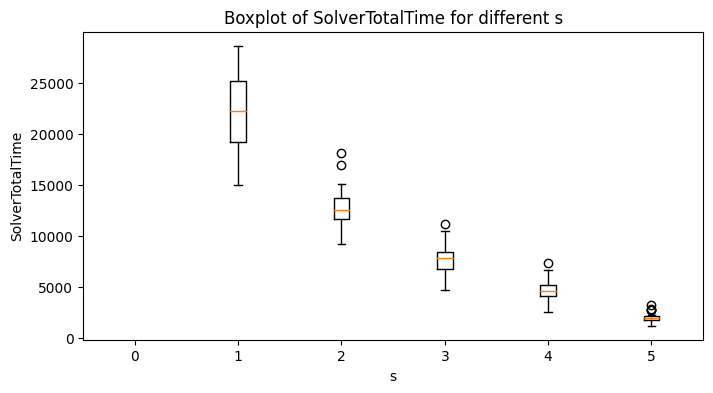

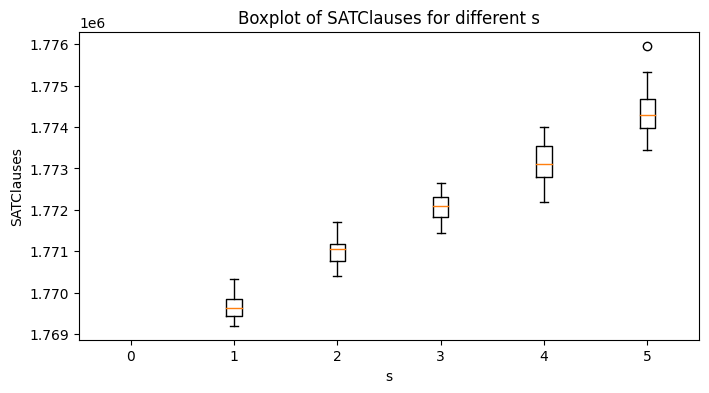

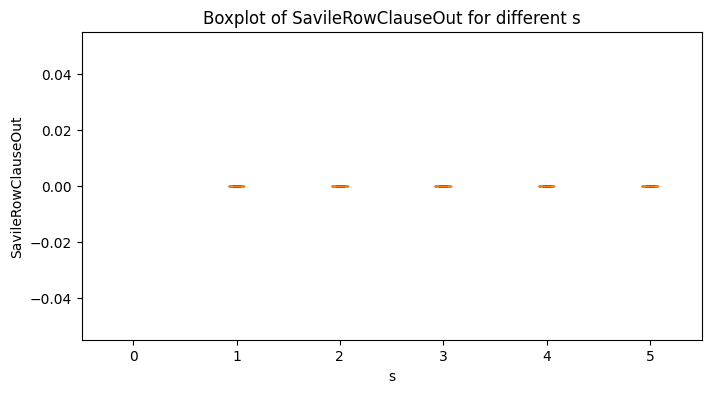

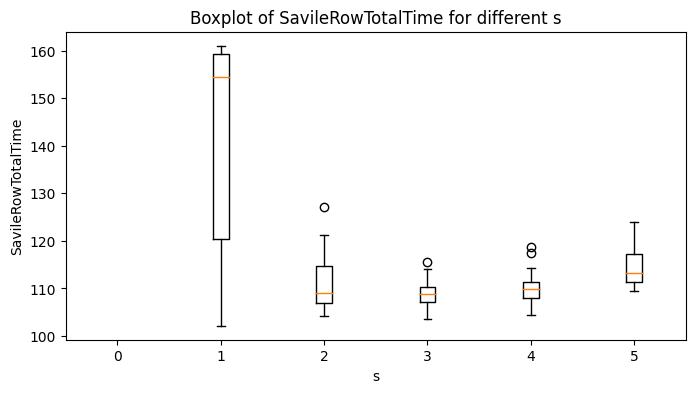

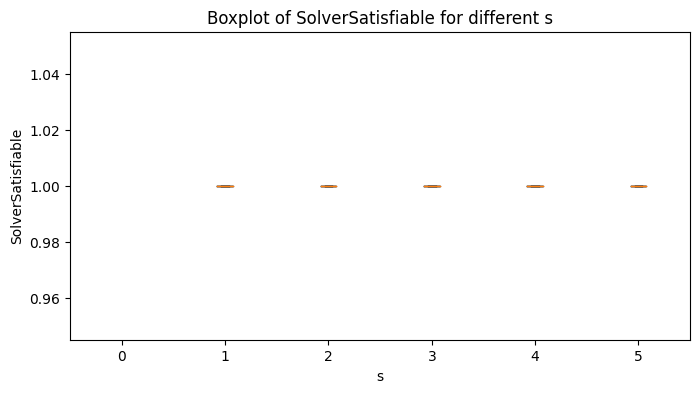

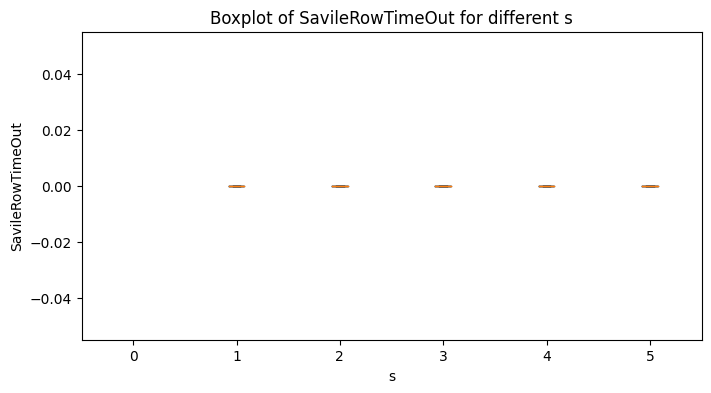

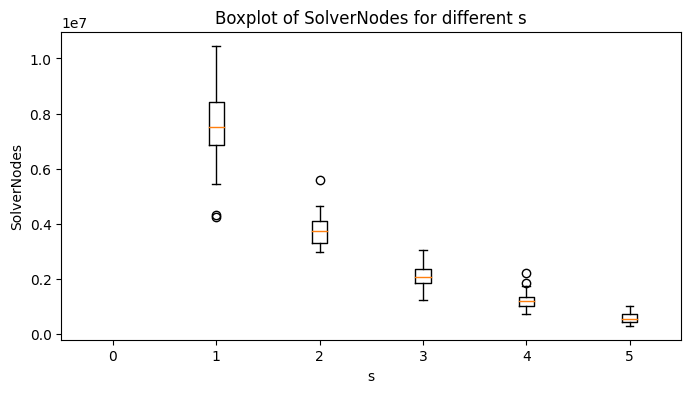

In [24]:
#@title Boxplots

def boxplot(df, var):

  groups = df[var].unique()

  for column in df.columns[2:-3]:
      plt.figure(figsize=(8, 4))
      for group in groups:
          group_data = df[df[var] == group][column]
          plt.boxplot(group_data, positions=[groups.tolist().index(group) + 1], labels=[group])

      plt.title(f'Boxplot of {column} for different {var}')
      plt.xlabel(var)
      plt.ylabel(column)
      plt.show()

boxplot(df_xor, 's')

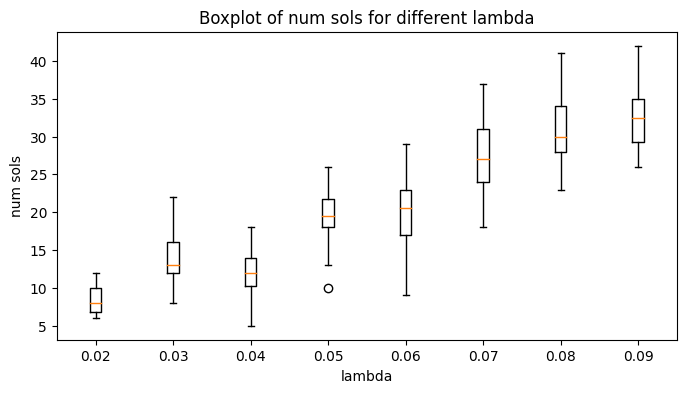

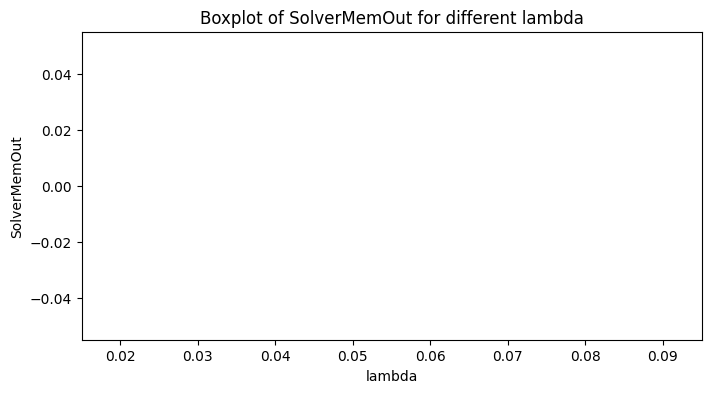

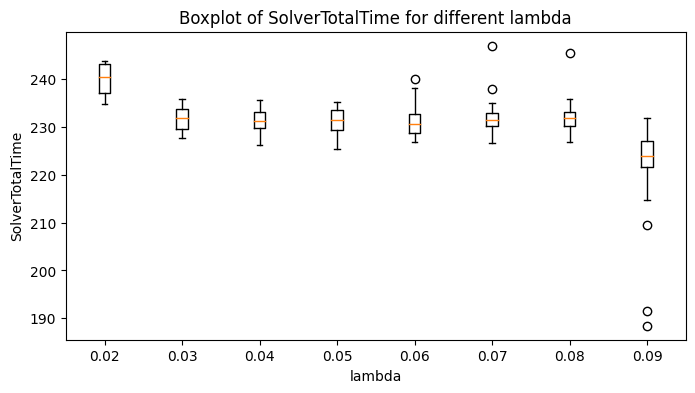

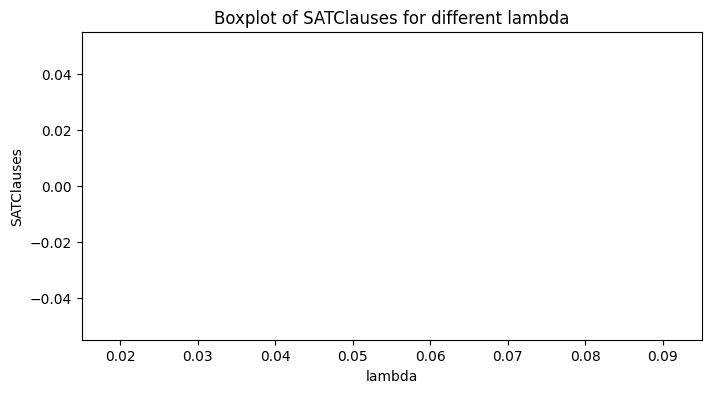

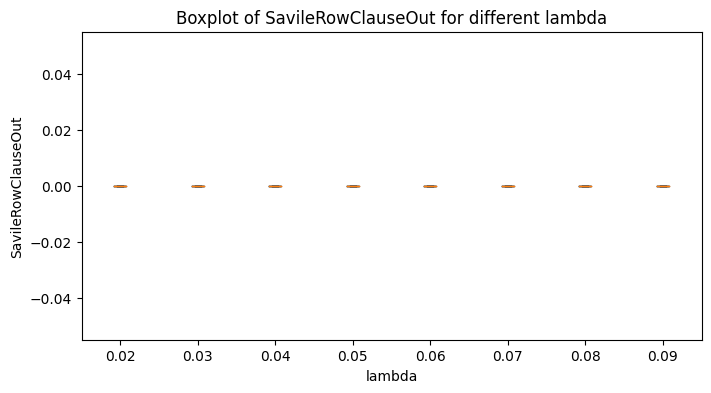

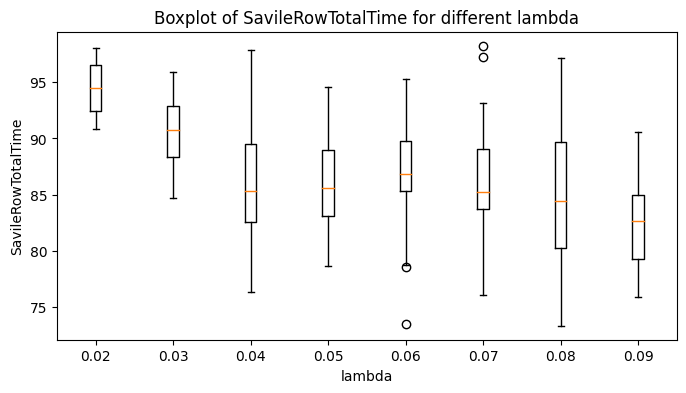

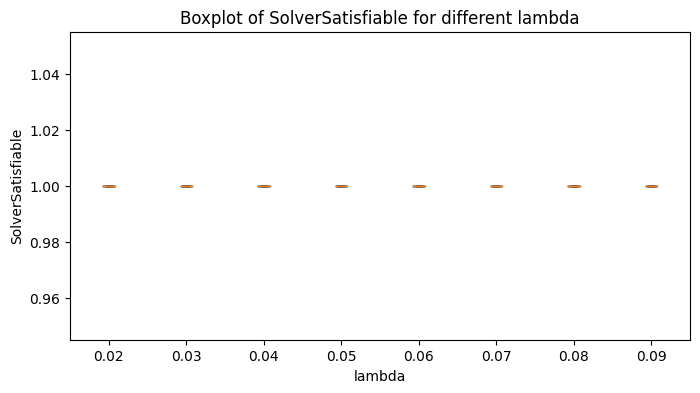

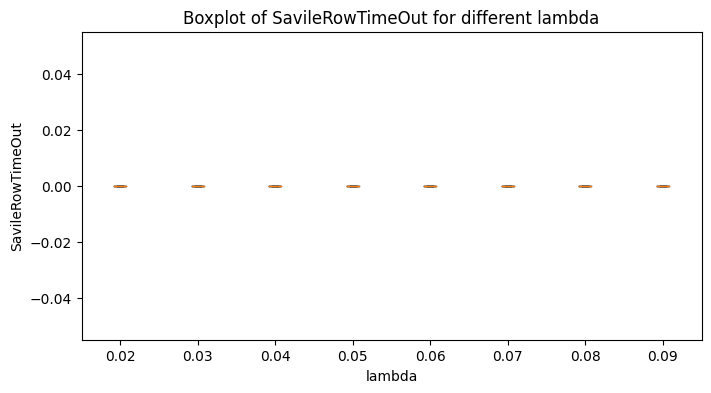

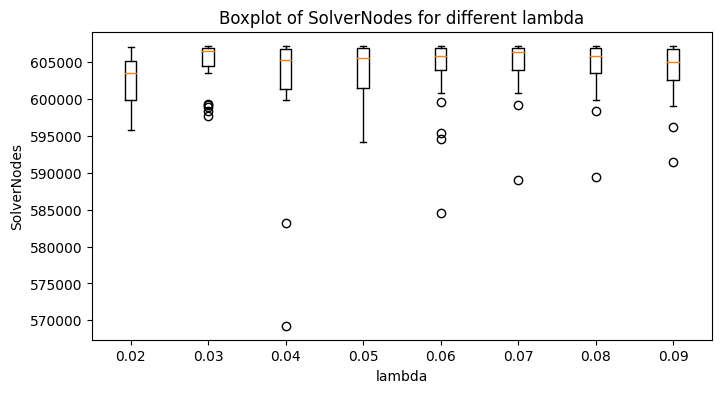

In [25]:
boxplot(df_linmod, 'lambda')